In [1]:
import numpy as np    
from sklearn.linear_model import LogisticRegression

x1 = np.random.randn(100)
x2 = 4*np.random.randn(100)
x3 = 0.5*np.random.randn(100)
y = (3 + x1 + x2 + x3 + 0.2*np.random.randn()) > 0
X = np.column_stack([x1, x2, x3])

m = LogisticRegression()
m.fit(X, y)

# The estimated coefficients will all be around 1:
print(m.coef_)

# Those values, however, will show that the second parameter
# is more influential
print(np.std(X, 0)*m.coef_)

[[1.39008518 1.21177883 0.3375147 ]]
[[1.45685451 4.95094502 0.16015393]]


In [2]:
np.std(X, 0)

array([1.04803254, 4.0856837 , 0.47450951])

In [3]:
import numpy as np    
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

x1 = np.random.randn(100)
x2 = np.random.randn(100)
x3 = np.random.randn(100)

#Make difference in feature dependance
y = (3 + x1 + 2*x2 + 5*x3 + 0.2*np.random.randn()) > 0

X = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3})

#Scale your data
scaler = StandardScaler()
scaler.fit(X) 
X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

clf = LogisticRegression(random_state = 0)
clf.fit(X_scaled, y)

feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
feature_importance = abs(clf.coef_[0])

In [5]:
feature_importance

array([0.98987326, 1.01909184, 3.0137725 ])

In [6]:
clf.coef_[0]

array([0.98987326, 1.01909184, 3.0137725 ])

In [7]:
100.0 * (feature_importance / feature_importance.max())

array([ 32.84498941,  33.81449143, 100.        ])

In [8]:
np.argsort(feature_importance)

array([0, 1, 2], dtype=int64)

In [10]:
sorted_idx=np.argsort(feature_importance)

In [11]:
sorted_idx.shape[0]

3

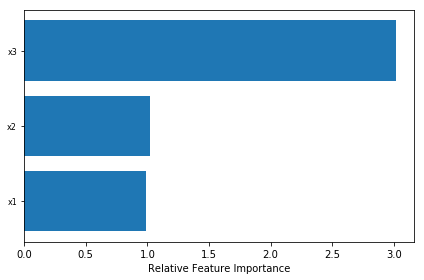

In [12]:
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer, HashingVectorizer

In [70]:
text=["If filename,   passed passed passed be  filename .", "if passed if ooo"]

In [71]:
cv=CountVectorizer()
hv=HashingVectorizer()
tft=TfidfTransformer(use_idf=False)
tfv=TfidfVectorizer()

In [72]:
cv_res=cv.fit_transform(text)

In [73]:
print(cv_res)

  (0, 0)	1
  (0, 4)	3
  (0, 1)	2
  (0, 2)	1
  (1, 3)	1
  (1, 4)	1
  (1, 2)	2


In [74]:
hv_res=hv.fit_transform(text)

In [75]:
print(hv_res)

  (0, 174974)	-0.2581988897471611
  (0, 662942)	0.2581988897471611
  (0, 792260)	0.7745966692414834
  (0, 878803)	0.5163977794943222
  (1, 424777)	-0.4082482904638631
  (1, 662942)	0.8164965809277261
  (1, 792260)	0.4082482904638631


In [76]:
print(tft.fit_transform(cv_res))

  (0, 0)	0.2581988897471611
  (0, 4)	0.7745966692414834
  (0, 1)	0.5163977794943222
  (0, 2)	0.2581988897471611
  (1, 3)	0.4082482904638631
  (1, 4)	0.4082482904638631
  (1, 2)	0.8164965809277261


In [69]:
print(tft.fit_transform(cv_res))

  (0, 4)	0.15712195407193108
  (0, 3)	0.4416588483317453
  (0, 6)	0.6624882724976179
  (0, 0)	0.22082942416587265
  (0, 8)	0.4416588483317453
  (0, 2)	0.22082942416587265
  (0, 1)	0.22082942416587265
  (1, 4)	0.7092972666062737
  (1, 7)	0.49844627974580596
  (1, 5)	0.49844627974580596


In [77]:
from __future__ import print_function

import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics



In [78]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


In [79]:
# parse commandline arguments
op = OptionParser()
op.add_option("--report",
              action="store_true", dest="print_report",
              help="Print a detailed classification report.")
op.add_option("--chi2_select",
              action="store", type="int", dest="select_chi2",
              help="Select some number of features using a chi-squared test")
op.add_option("--confusion_matrix",
              action="store_true", dest="print_cm",
              help="Print the confusion matrix.")
op.add_option("--top10",
              action="store_true", dest="print_top10",
              help="Print ten most discriminative terms per class"
                   " for every classifier.")
op.add_option("--all_categories",
              action="store_true", dest="all_categories",
              help="Whether to use all categories or not.")
op.add_option("--use_hashing",
              action="store_true",
              help="Use a hashing vectorizer.")
op.add_option("--n_features",
              action="store", type=int, default=2 ** 16,
              help="n_features when using the hashing vectorizer.")
op.add_option("--filtered",
              action="store_true",
              help="Remove newsgroup information that is easily overfit: "
                   "headers, signatures, and quoting.")

<Option at 0x1d2ddddd4a8: --filtered>

In [101]:
def is_interactive():
    return not hasattr(sys.modules['__main__'], '__file__')

# work-around for Jupyter notebook and IPython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)

print(__doc__)
op.print_help()
print()

Automatically created module for IPython interactive environment
Usage: ipykernel_launcher.py [options]

Options:
  -h, --help            show this help message and exit
  --report              Print a detailed classification report.
  --chi2_select=SELECT_CHI2
                        Select some number of features using a chi-squared
                        test
  --confusion_matrix    Print the confusion matrix.
  --top10               Print ten most discriminative terms per class for
                        every classifier.
  --all_categories      Whether to use all categories or not.
  --use_hashing         Use a hashing vectorizer.
  --n_features=N_FEATURES
                        n_features when using the hashing vectorizer.
  --filtered            Remove newsgroup information that is easily overfit:
                        headers, signatures, and quoting.



In [109]:
--help


TypeError: bad operand type for unary -: '_Helper'

In [82]:
# #############################################################################
# Load some categories from the training set
if opts.all_categories:
    categories = None
else:
    categories = [
        'alt.atheism',
        'talk.religion.misc',
        'comp.graphics',
        'sci.space',
    ]

if opts.filtered:
    remove = ('headers', 'footers', 'quotes')
else:
    remove = ()

print("Loading 20 newsgroups dataset for categories:")
print(categories if categories else "all")

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']


In [83]:
data_train = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42,
                                remove=remove)

data_test = fetch_20newsgroups(subset='test', categories=categories,
                               shuffle=True, random_state=42,
                               remove=remove)
print('data loaded')

2018-09-25 09:48:01,879 INFO Downloading 20news dataset. This may take a few minutes.
2018-09-25 09:48:01,880 INFO Downloading dataset from https://ndownloader.figshare.com/files/5975967 (14 MB)


data loaded


In [85]:
# order of labels in `target_names` can be different from `categories`
target_names = data_train.target_names

In [88]:

def size_mb(docs):
    return sum(len(s.encode('utf-8')) for s in docs) / 1e6

data_train_size_mb = size_mb(data_train.data)
data_test_size_mb = size_mb(data_test.data)

print("%d documents - %0.3fMB (training set)" % (
    len(data_train.data), data_train_size_mb))
print("%d documents - %0.3fMB (test set)" % (
    len(data_test.data), data_test_size_mb))
print("%d categories" % len(categories))
print()


2034 documents - 3.980MB (training set)
1353 documents - 2.867MB (test set)
4 categories



In [94]:
data_train.target_names



['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

In [95]:
# split a training set and a test set
y_train, y_test = data_train.target, data_test.target

In [119]:
print("Extracting features from the training data using a sparse vectorizer")
t0=time()
#vectorizer = HashingVectorizer(stop_words='english', alternate_sign=False)
#X_train = vectorizer.transform(data_train.data)

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
X_train = vectorizer.fit_transform(data_train.data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_train_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_train.shape)
print()

Extracting features from the training data using a sparse vectorizer
done in 0.438804s at 9.069MB/s
n_samples: 2034, n_features: 33809



In [120]:
print("Extracting features from the test data using the same vectorizer")
t0 = time()
X_test = vectorizer.transform(data_test.data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_test_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_test.shape)
print()

Extracting features from the test data using the same vectorizer
done in 0.272251s at 10.533MB/s
n_samples: 1353, n_features: 33809



In [126]:
# mapping from integer feature name to original token string
#if opts.use_hashing:
#feature_names = None
#else:
feature_names = vectorizer.get_feature_names()


In [113]:

print("Extracting %d best features by a chi-squared test" %
          40000)
t0 = time()
ch2 = SelectKBest(chi2, k=40000)
X_train = ch2.fit_transform(X_train, y_train)
X_test = ch2.transform(X_test)
if feature_names:
       # keep selected feature names
         feature_names = [feature_names[i] for i
                         in ch2.get_support(indices=True)]
print("done in %fs" % (time() - t0))
print()



Extracting 40000 best features by a chi-squared test
done in 4.721352s



In [127]:
if feature_names:
    feature_names = np.asarray(feature_names)

In [131]:
target_names

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

In [122]:
def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."



In [132]:
# #############################################################################
# Benchmark classifiers
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        if feature_names is not None:
            print("top 10 keywords per class:")
            for i, label in enumerate(target_names):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))
        print()

    
    print("classification report:")
    print(metrics.classification_report(y_test, pred,
                                            target_names=target_names))

  
    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time


Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.185s


C:\Users\KryvalapavaP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:319: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "


test time:  0.002s
accuracy:   0.897
dimensionality: 33809
density: 1.000000
top 10 keywords per class:
alt.atheism: rushdie osrhe wingate god okcforum caltech islamic atheism keith...
comp.graphics: animation video looking card hi 3d thanks file image graphics
sci.space: digex flight shuttle launch pat moon sci orbit nasa space
talk.religion.misc: jesus mitre hudson morality 2000 biblical beast mr fbi ch...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.83      0.85       319
     comp.graphics       0.90      0.98      0.94       389
         sci.space       0.96      0.94      0.95       394
talk.religion.misc       0.83      0.78      0.80       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[266  10   7  36]
 [  1 381   4   3]
 [  0  22 372   0]
 [ 40  10   6 195]]

Perceptron
________________________________________________________________________________
Training: 
Pe

C:\Users\KryvalapavaP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\KryvalapavaP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.149s
test time:  0.003s
accuracy:   0.902
dimensionality: 33809
density: 0.700413
top 10 keywords per class:
alt.atheism: bible atheist osrhe wingate okcforum caltech islamic keith athei...
comp.graphics: 42 package video 3d hi files file animation image graphics
sci.space: planets shuttle pat launch sci dc nasa moon orbit space
talk.religion.misc: abortion koresh biblical hudson beast morality mr fbi 200...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.84      0.85       319
     comp.graphics       0.93      0.97      0.95       389
         sci.space       0.95      0.95      0.95       394
talk.religion.misc       0.83      0.80      0.81       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[267   5  10  37]
 [  2 378   5   4]
 [  2  15 376   1]
 [ 37   8   6 200]]

kNN
________________________________________________________________________________
Traini

C:\Users\KryvalapavaP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.205s
test time:  0.001s
accuracy:   0.873
dimensionality: 33809
density: 0.005553
top 10 keywords per class:
alt.atheism: bmd benedikt rice rushdie wingate islamic atheism wwc keith athe...
comp.graphics: sphere virtual 42 files windows hi image 3d 3do graphics
sci.space: pat henry sunrise rockets dc launch flight moon orbit space
talk.religion.misc: hudson thyagi biblical 2000 abortion kendig hare mitre ch...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.85      0.75      0.80       319
     comp.graphics       0.89      0.97      0.93       389
         sci.space       0.94      0.94      0.94       394
talk.religion.misc       0.76      0.78      0.77       251

       avg / total       0.87      0.87      0.87      1353

confusion matrix:
[[238  14  11  56]
 [  0 378   7   4]
 [  2  22 369   1]
 [ 39  12   4 196]]

________________________________________________________________________________
Training

C:\Users\KryvalapavaP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.344s
test time:  0.001s
accuracy:   0.885
dimensionality: 33809
density: 0.020394
top 10 keywords per class:
alt.atheism: perry psilink rice charley wingate rushdie keith islamic atheism...
comp.graphics: hi code color file video files animation 3do image graphics
sci.space: sky launch rockets solar sci moon flight dc orbit space
talk.religion.misc: hare hudson biblical mr 2000 homosexuality abortion beast...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.86      0.78      0.82       319
     comp.graphics       0.92      0.96      0.94       389
         sci.space       0.93      0.95      0.94       394
talk.religion.misc       0.78      0.81      0.79       251

       avg / total       0.89      0.89      0.88      1353

confusion matrix:
[[249   9  12  49]
 [  1 373  10   5]
 [  3  15 373   3]
 [ 36   8   4 203]]

Elastic-Net penalty
______________________________________________________________________

C:\Users\KryvalapavaP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.442s
test time:  0.003s
accuracy:   0.902
dimensionality: 33809
density: 0.188715
top 10 keywords per class:
alt.atheism: okcforum rushdie caltech charley cobb wingate islamic keith athe...
comp.graphics: computer hi points 42 3do 3d file animation image graphics
sci.space: rockets shuttle planets launch sci dc nasa moon orbit space
talk.religion.misc: homosexuality abortion 666 morality biblical mr 2000 fbi ...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.84      0.85       319
     comp.graphics       0.92      0.98      0.95       389
         sci.space       0.96      0.94      0.95       394
talk.religion.misc       0.83      0.80      0.81       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[268   7   8  36]
 [  0 380   4   5]
 [  2  19 372   1]
 [ 38   7   5 201]]

NearestCentroid (aka Rocchio classifier)
______________________________________________

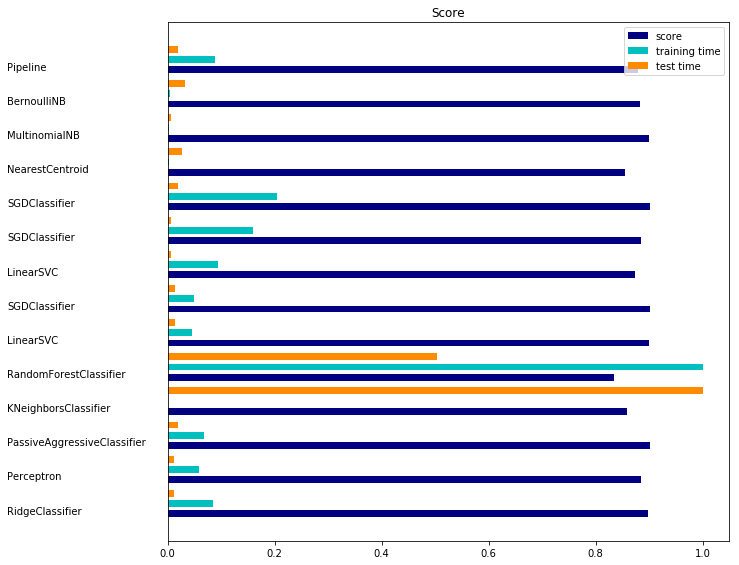

In [133]:

results = []
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
        (Perceptron(n_iter=50), "Perceptron"),
        (PassiveAggressiveClassifier(n_iter=50), "Passive-Aggressive"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (RandomForestClassifier(n_estimators=100), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False,
                                       tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,
                                           penalty=penalty)))

# Train SGD with Elastic Net penalty
print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,
                                       penalty="elasticnet")))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.01)))
results.append(benchmark(BernoulliNB(alpha=.01)))

print('=' * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(benchmark(Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False,
                                                  tol=1e-3))),
  ('classification', LinearSVC(penalty="l2"))])))

# make some plots

indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()